In this scenario, Lana has contacted you and is looking for advice on how to start up a successful cookie business. She has been dreaming of owning a business for years now and she has come up with a great idea. You are an analyst who provides recommendations to small businesses, and you have been tasked with helping Lana out.

Lana needs to decide on the kinds of customers she should target and the types of cookies to sell. Once she is confident in her decisions, she’ll be able to take out a loan to kick off her first small business!

### Summary

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import datetime

%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

import warnings
warnings.filterwarnings('ignore')

#import feature_engine.missing_data_imputers as mdi
#from feature_engine.outlier_removers import Winsorizer
#from feature_engine import categorical_encoders as ce

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)

np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


In [2]:
df = pd.read_csv("cookies.csv")

In [3]:
df

,CustomerID,Age,AgeGroup,Postcode,Gender,FavouriteCookie,Cookiesboughteachweek
0,1001,60,60-69,2000,M,Choc chip,1
1,1002,53,50-59,2010,M,Choc chip,1
2,1003,22,20-29,2010,F,Choc chip,2
3,1004,30,30-39,2010,F,Choc chip,6
4,1005,52,50-59,2010,F,Macadamia,3
5,1006,22,20-29,2022,F,Macadamia,3
6,1007,26,20-29,2010,F,Macadamia,8
7,1008,40,40-49,2022,F,Triple choc,2
8,1009,42,40-49,2022,F,Granola,1
9,1010,22,20-29,2000,M,Granola,3


### Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   CustomerID             46 non-null     int64 
 1   Age                    46 non-null     int64 
 2   AgeGroup               46 non-null     object
 3   Postcode               46 non-null     int64 
 4   Gender                 46 non-null     object
 5   FavouriteCookie        46 non-null     object
 6   Cookiesboughteachweek  46 non-null     int64 
dtypes: int64(4), object(3)
memory usage: 2.6+ KB


In [5]:
df.describe()

,CustomerID,Age,Postcode,Cookiesboughteachweek
count,46.000000,46.000000,46.000000,46.000000
mean,1023.500000,34.173913,2136.217391,4.065217
std,13.422618,16.189577,204.315433,3.761809
min,1001.000000,12.000000,2000.000000,1.000000
25%,1012.250000,20.250000,2000.000000,1.250000
50%,1023.500000,31.500000,2014.500000,3.000000
75%,1034.750000,44.750000,2296.250000,5.750000
max,1046.000000,68.000000,2873.000000,20.000000


### Data Visualization

### Univariate Data Exploration

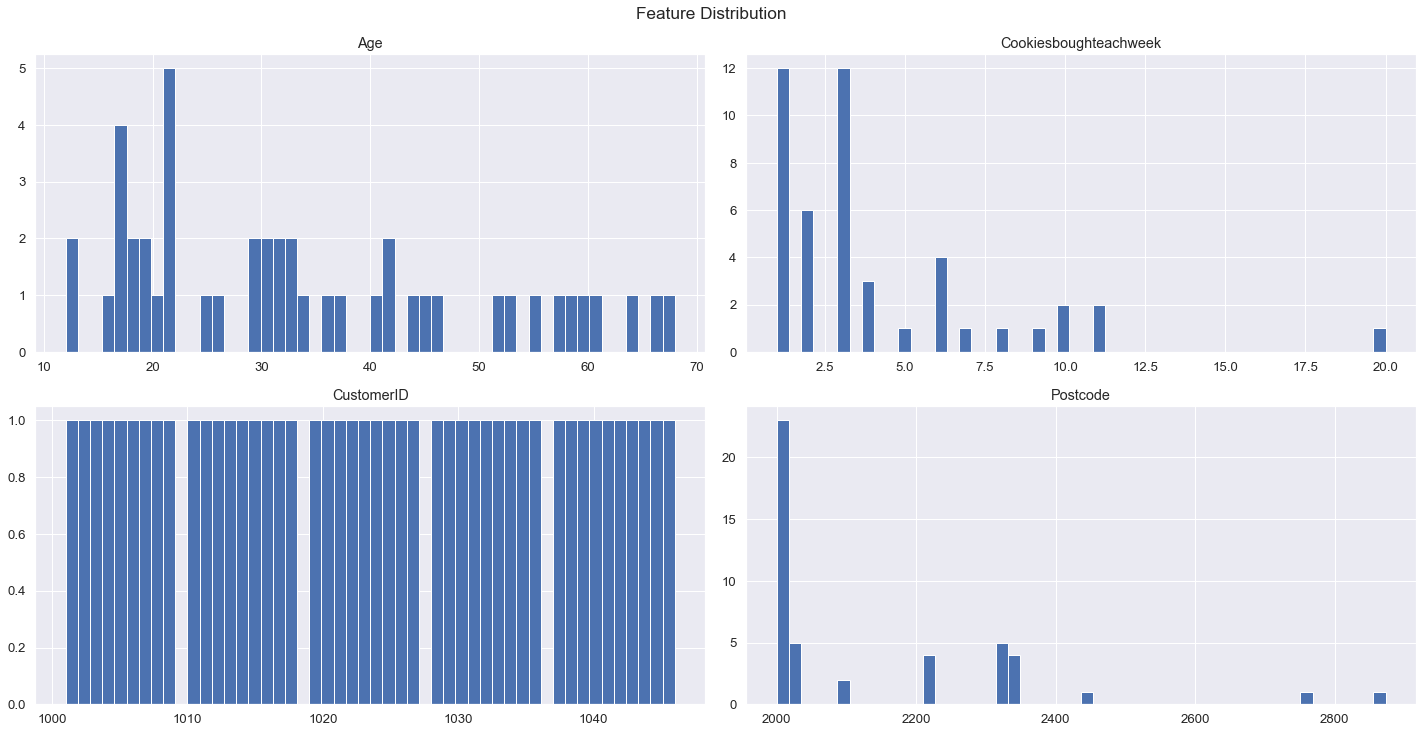

In [6]:
df.hist(bins=50, figsize=(20,10))
plt.suptitle('Feature Distribution', x=0.5, y=1.02, ha='center', fontsize='large')
plt.tight_layout()
plt.show()

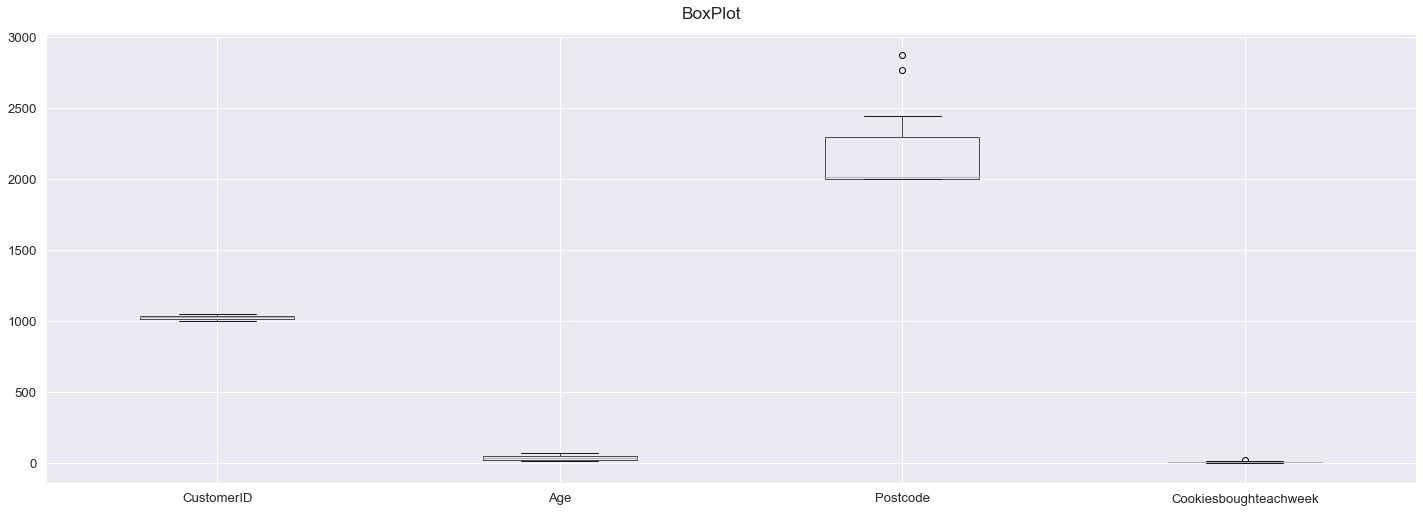

In [7]:
df.boxplot(figsize=(20,7))
plt.suptitle('BoxPlot', x=0.5, y=1.02, ha='center', fontsize='large')
plt.tight_layout()
plt.show()

In [8]:
df.columns

Index(['CustomerID', 'Age', 'AgeGroup', 'Postcode', 'Gender', 'FavouriteCookie', 'Cookiesboughteachweek'], dtype='object')

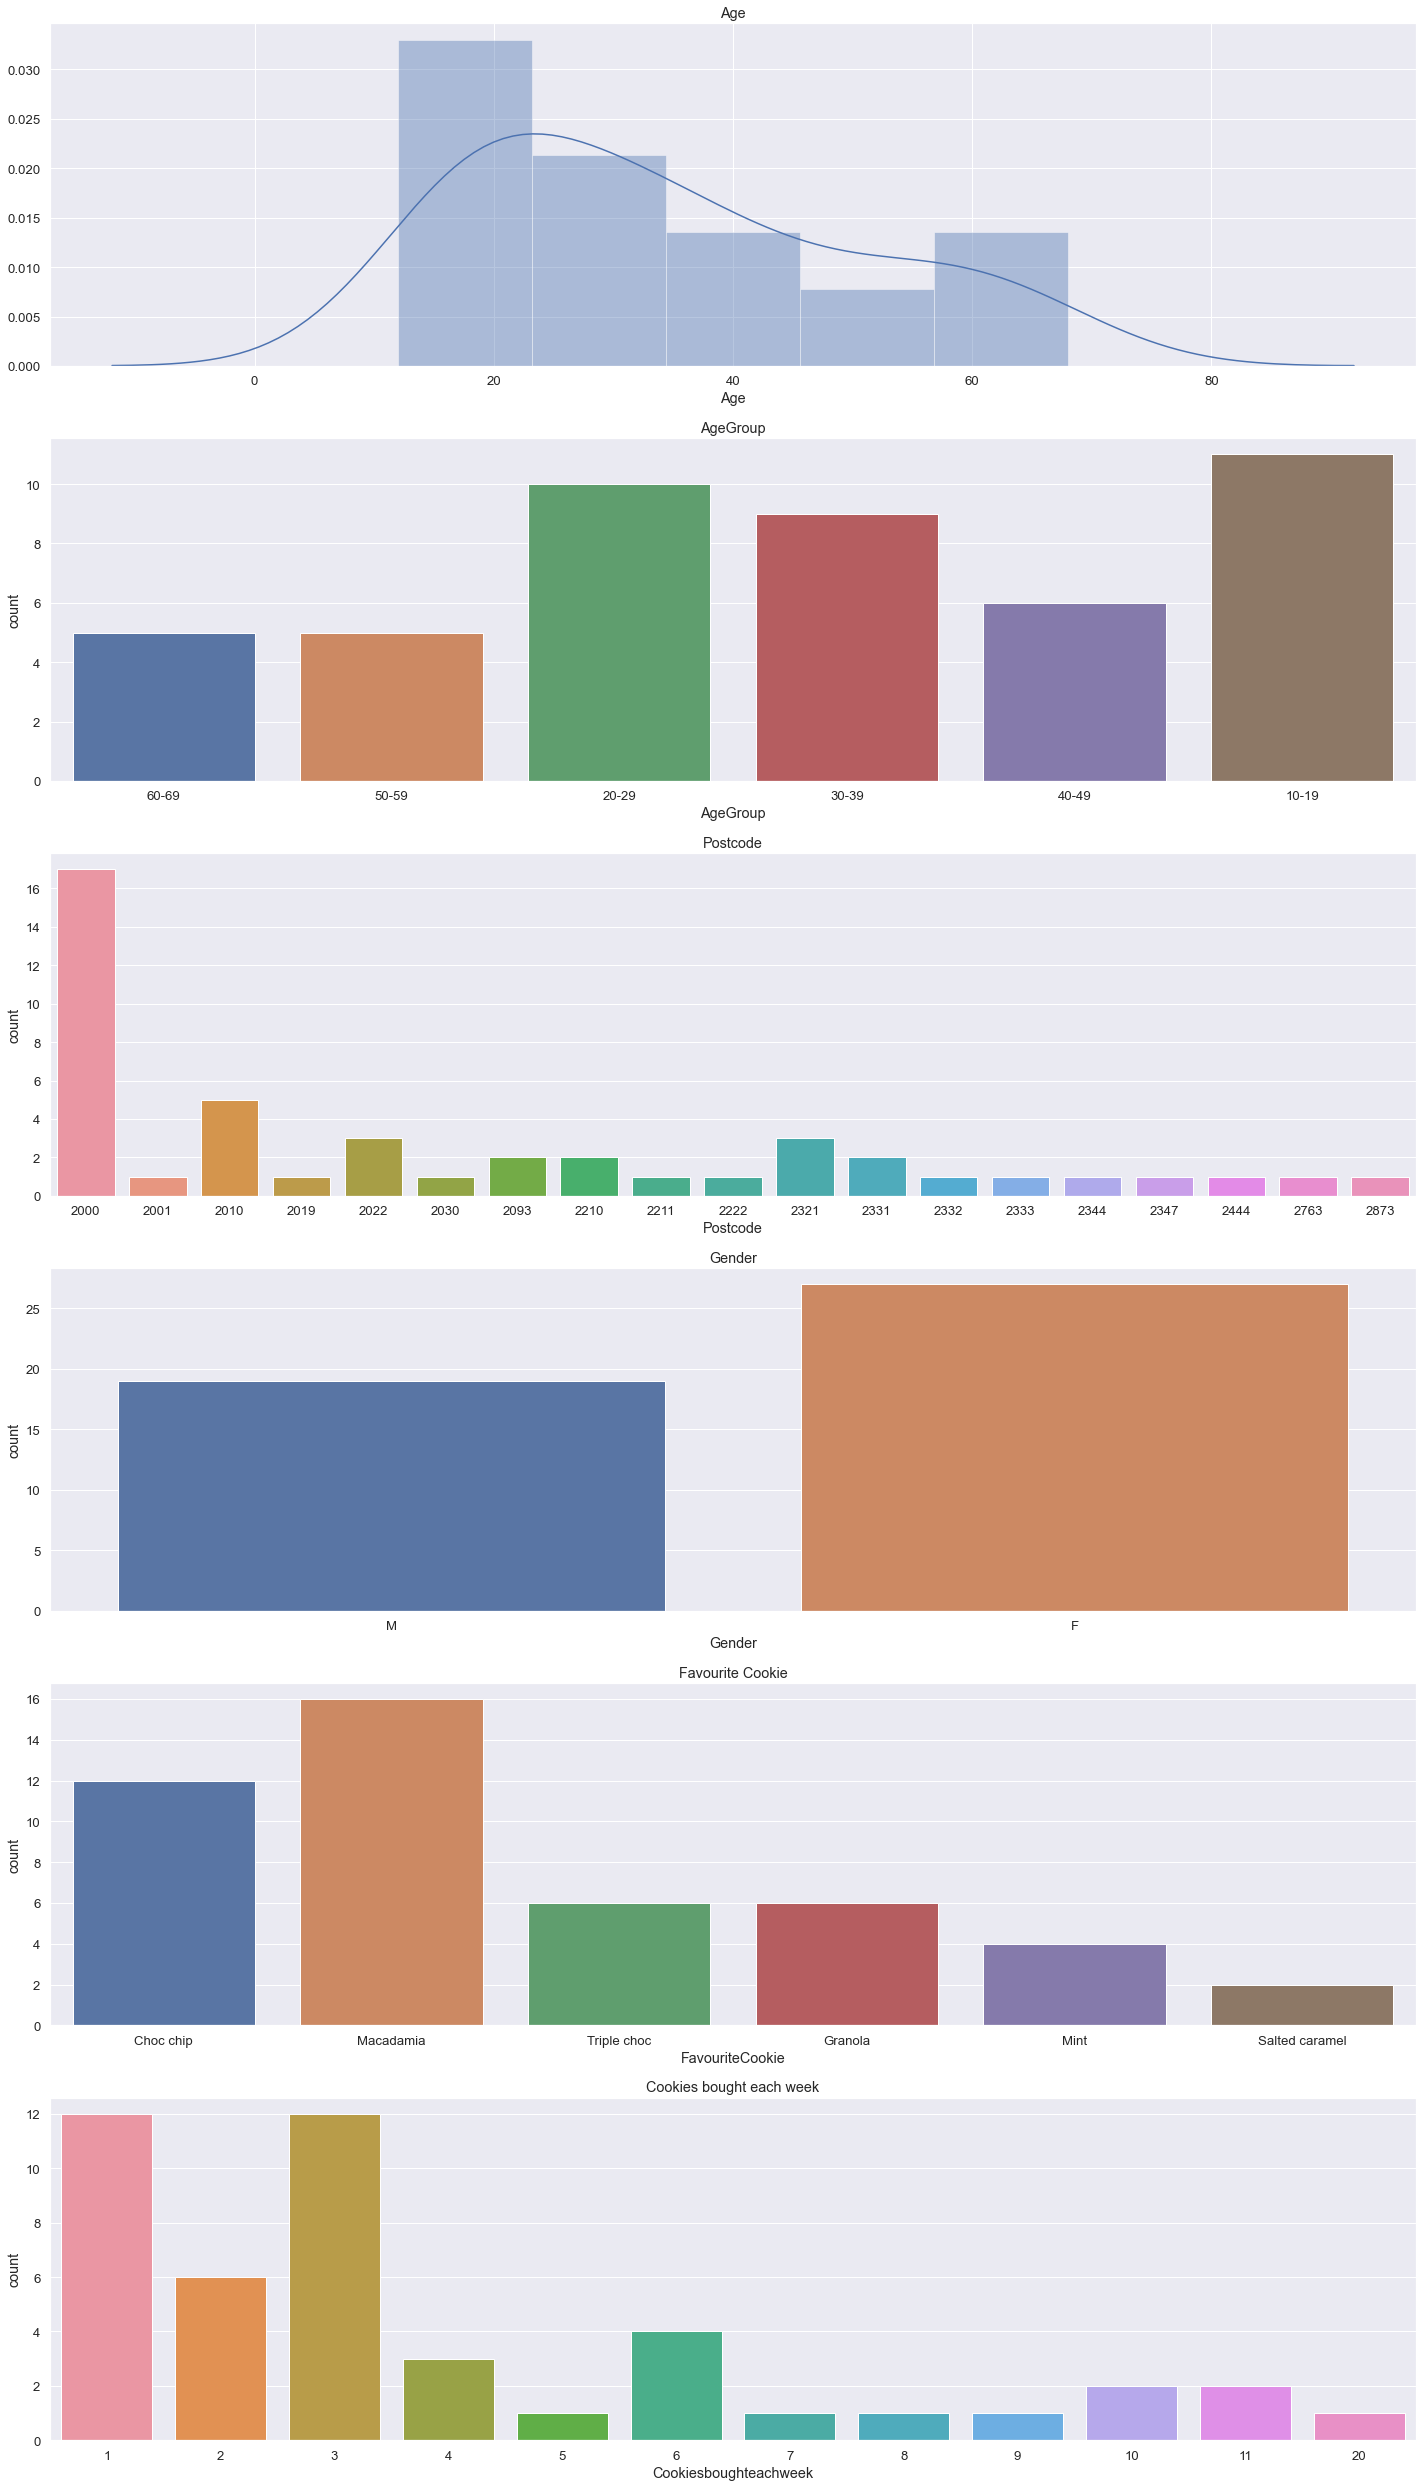

In [9]:
fig = plt.figure(figsize=(20,40))

plt.subplot(7,1,1)
plt.title("Age")
sns.distplot(a=df.Age)

plt.subplot(7,1,2)
plt.title("AgeGroup")
sns.countplot(df.AgeGroup)

plt.subplot(7,1,3)
plt.title("Postcode")
sns.countplot(df.Postcode)

plt.subplot(7,1,4)
plt.title("Gender")
sns.countplot(df.Gender)

plt.subplot(7,1,5)
plt.title("Favourite Cookie")
sns.countplot(df.FavouriteCookie)

plt.subplot(7,1,6)
plt.title("Cookies bought each week")
sns.countplot(df.Cookiesboughteachweek)

plt.tight_layout()
plt.show()

### Time-Series Analysis

In [10]:
#timeseries = df[['date','extraction','month', 'day']]

In [11]:
#timeseries

In [12]:
#timeseries.info()

In [13]:
# fig = plt.figure(figsize=(30,10))
# sns.lineplot(x=df.date,y=df.amount,data=df, estimator=None)
# plt.title("Amount spend per date")
# plt.show()

In [14]:
# fig = plt.figure(figsize=(30,10))
# sns.lineplot(x=df.month,y=df.amount,data=df, estimator=None)
# plt.title("Amount spend per month")
# plt.show()

### Pairplots

<Figure size 1440x1440 with 0 Axes>

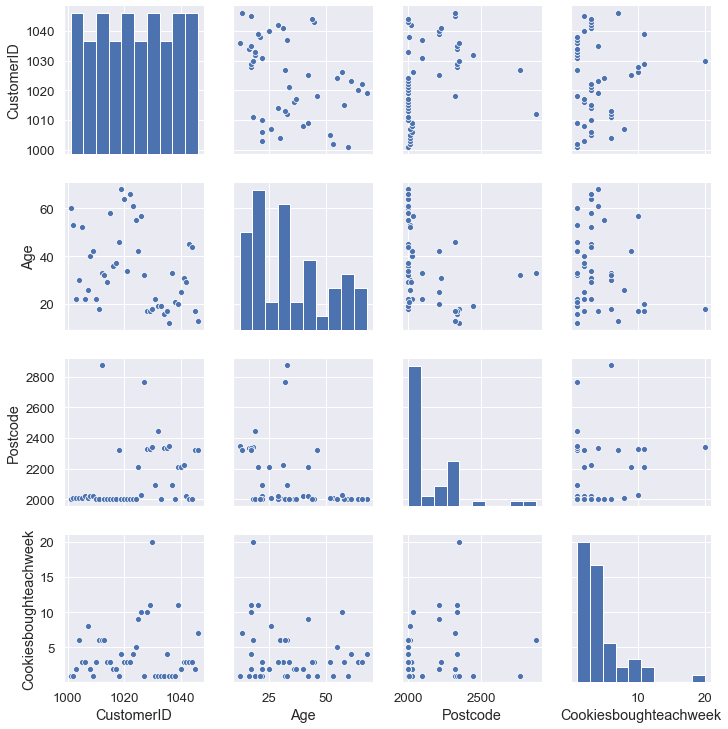

In [15]:
plt.figure(figsize=(20,20))
plt.suptitle('Pairplots of features', x=0.5, y=1.02, ha='center', fontsize='large')
sns.pairplot(df)
plt.show()

### Bivariate Data Exploration

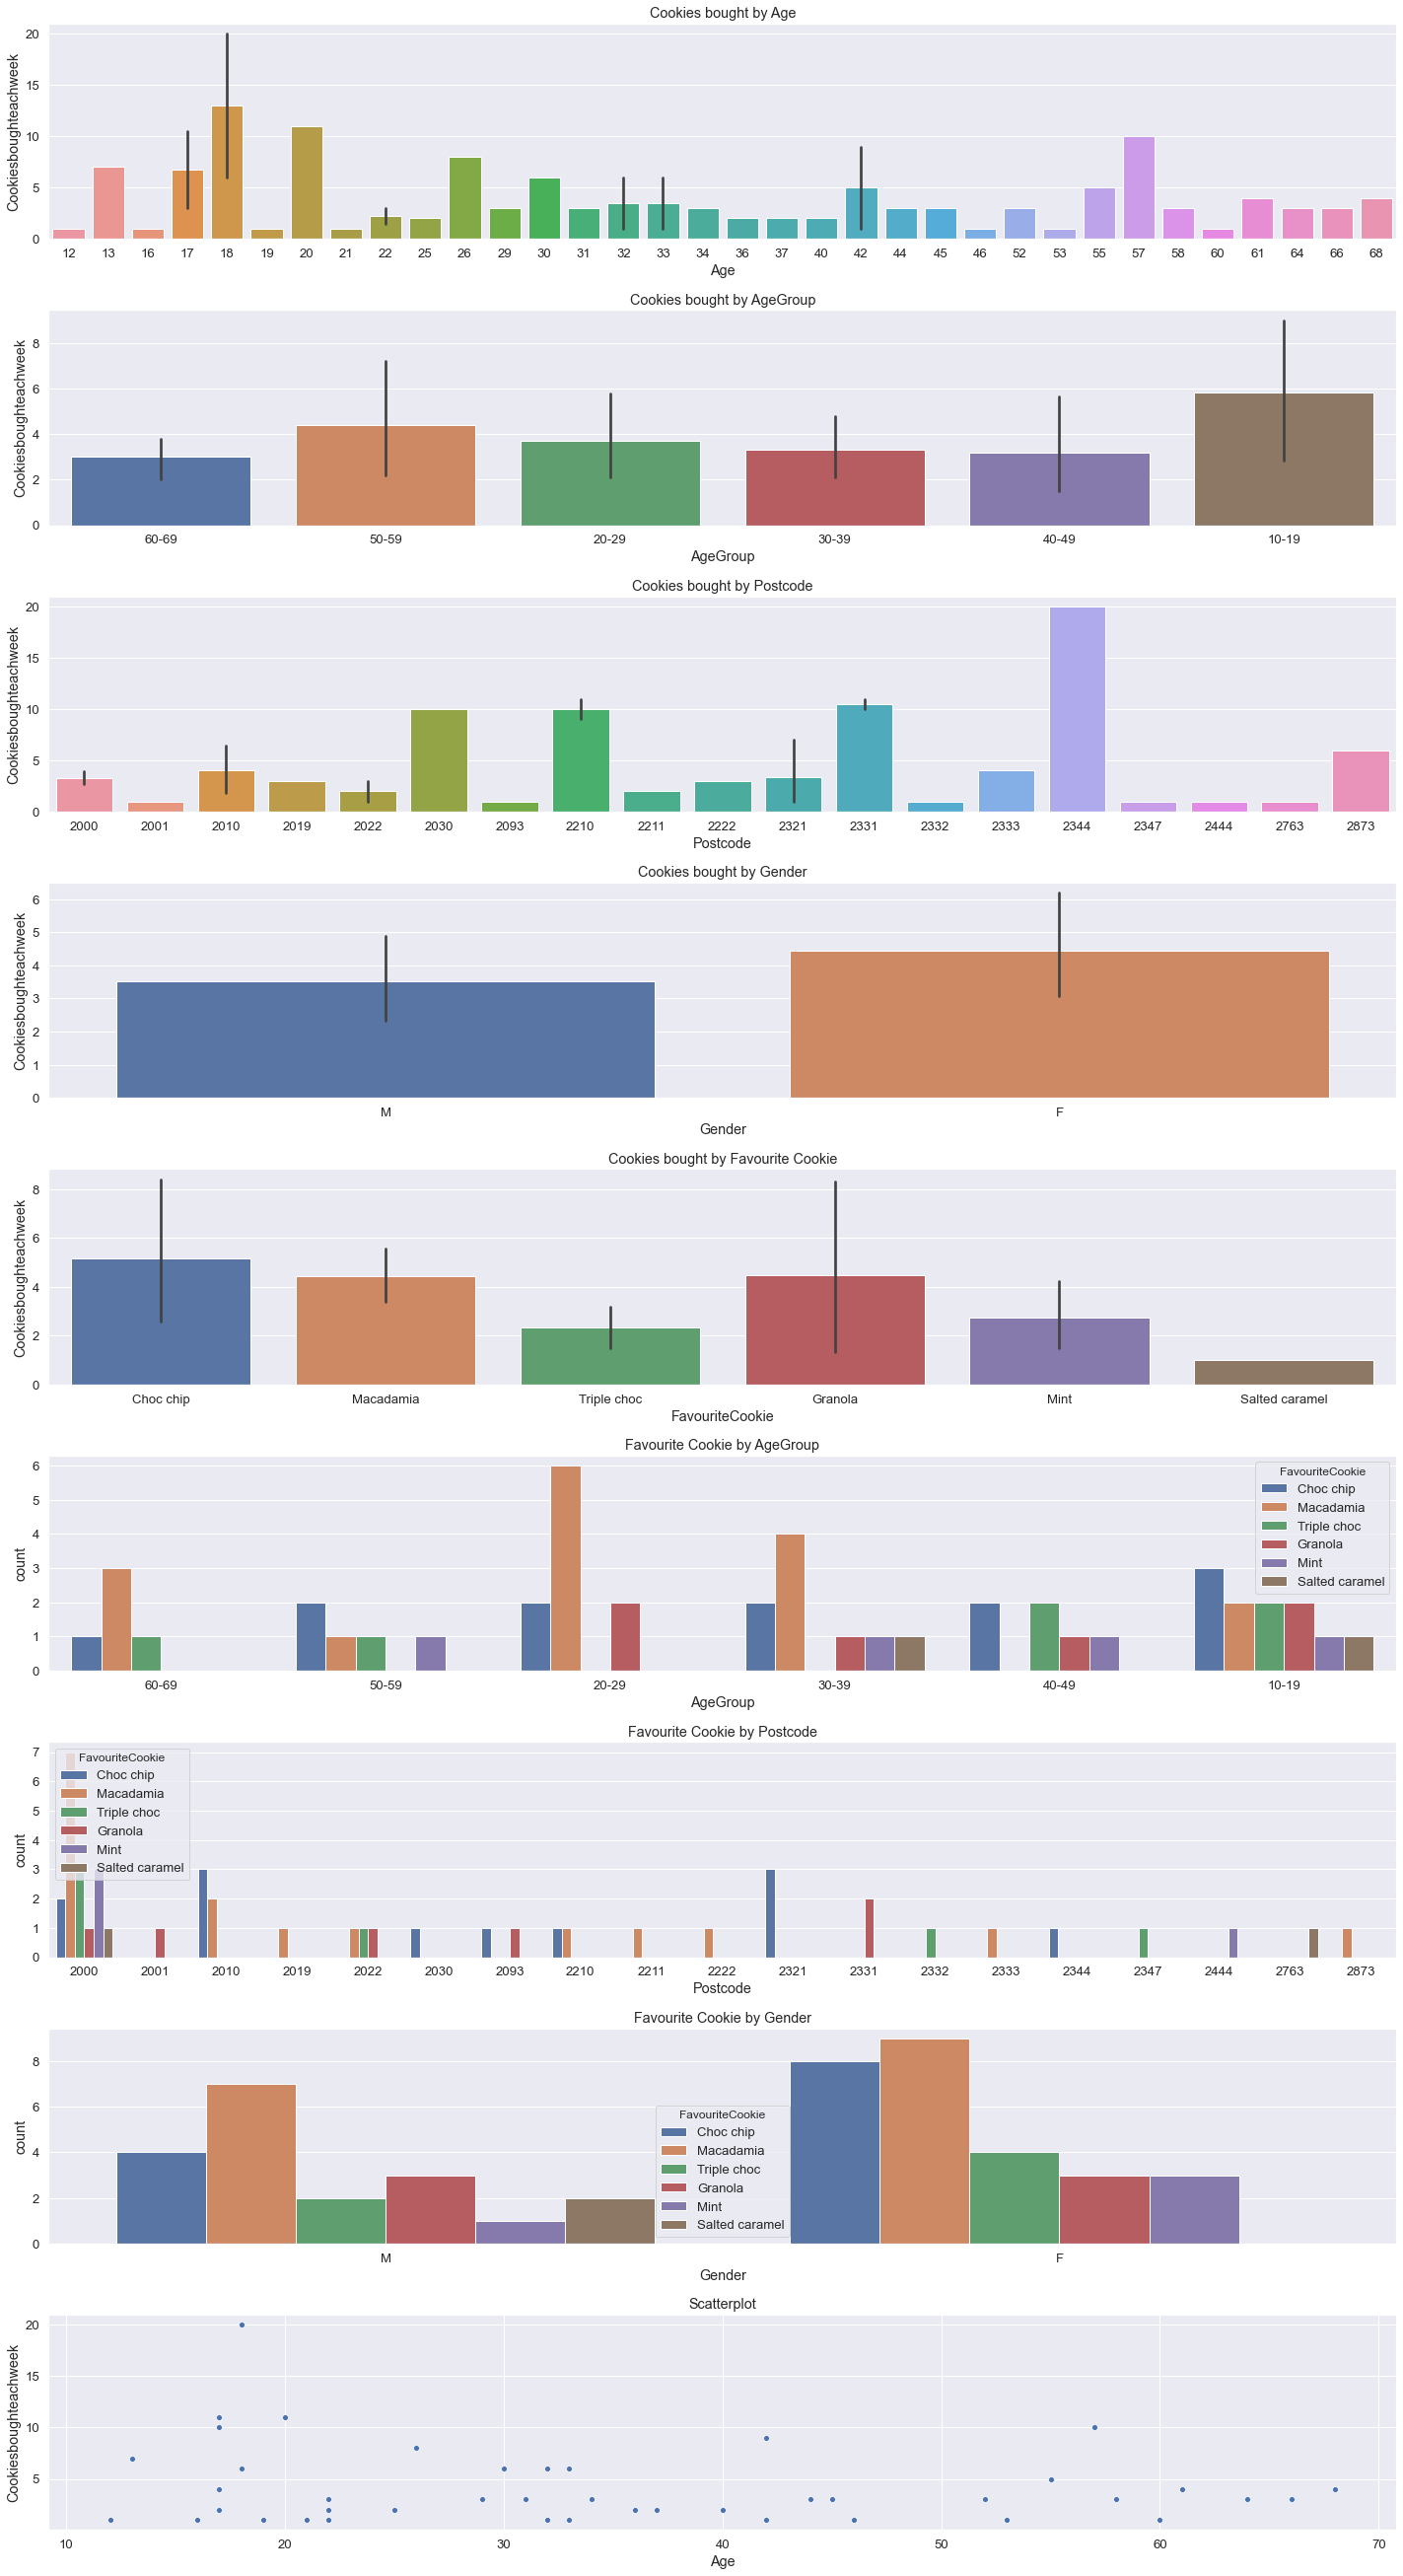

In [16]:
fig = plt.figure(figsize=(20,40))

plt.subplot(10,1,1)
plt.title("Cookies bought by Age")
sns.barplot(x=df.Age, y=df.Cookiesboughteachweek, data=df)

plt.subplot(10,1,2)
plt.title("Cookies bought by AgeGroup")
sns.barplot(x=df.AgeGroup, y=df.Cookiesboughteachweek, data=df)

plt.subplot(10,1,3)
plt.title("Cookies bought by Postcode")
sns.barplot(x=df.Postcode, y=df.Cookiesboughteachweek, data=df)

plt.subplot(10,1,4)
plt.title("Cookies bought by Gender")
sns.barplot(x=df.Gender, y=df.Cookiesboughteachweek, data=df)

plt.subplot(10,1,5)
plt.title("Cookies bought by Favourite Cookie")
sns.barplot(x=df.FavouriteCookie, y=df.Cookiesboughteachweek, data=df)

plt.subplot(10,1,6)
plt.title("Favourite Cookie by AgeGroup")
sns.countplot(df.AgeGroup, hue=df.FavouriteCookie)

plt.subplot(10,1,7)
plt.title("Favourite Cookie by Postcode")
sns.countplot(df.Postcode, hue=df.FavouriteCookie)

plt.subplot(10,1,8)
plt.title("Favourite Cookie by Gender")
sns.countplot(df.Gender, hue=df.FavouriteCookie)

plt.subplot(10,1,9)
plt.title("Scatterplot")
sns.scatterplot(x=df.Age, y=df.Cookiesboughteachweek)

plt.tight_layout()
plt.show()

### Correlation

In [17]:
df.corr()

,CustomerID,Age,Postcode,Cookiesboughteachweek
CustomerID,1.000000,-0.347998,0.302106,0.074597
Age,-0.347998,1.000000,-0.395040,-0.165118
Postcode,0.302106,-0.395040,1.000000,0.178922
Cookiesboughteachweek,0.074597,-0.165118,0.178922,1.000000


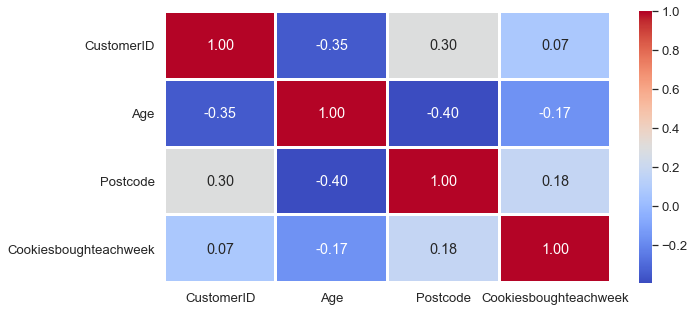

In [18]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.show()

### Using Groupby

In [19]:
df.groupby(by='AgeGroup').sum()

,CustomerID,Age,Postcode,Cookiesboughteachweek
AgeGroup,,,,
10-19,11359,183,25104,64
20-29,10230,238,20576,37
30-39,9188,298,19961,30
40-49,6147,259,12575,19
50-59,5072,275,10050,22
60-69,5085,319,10000,15


In [20]:
df.groupby(by='Postcode').sum()

,CustomerID,Age,Cookiesboughteachweek
Postcode,,,
2000,17346,748,55
2001,1038,21,1
2010,5021,183,20
2019,1042,29,3
2022,3023,104,6
2030,1026,57,10
2093,2068,55,2
2210,2064,62,20
2211,1040,25,2


In [21]:
df.groupby(by='Gender').sum()

,CustomerID,Age,Postcode,Cookiesboughteachweek
Gender,,,,
F,27629,875,57285,120
M,19452,697,40981,67
